In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import random
from scipy.stats import multivariate_normal
from GMM import GMM

In [3]:
def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    '''
    Generates data from a random mixture of Gaussians in a given range.
    Will also plot the points in case of 2D.
    input:
        - k: Number of Gaussian clusters
        - dim: Dimension of generated points
        - points_per_cluster: Number of points to be generated for each cluster
        - lim: Range of mean values
    output:
        - X: Generated points (points_per_cluster*k, dim)
    '''
    x = []
    mean = random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True) 
    return x

In [4]:
def plot(title):
    '''
    Draw the data points and the fitted mixture model.
    input:
        - title: title of plot and name with which it will be saved.
    '''
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-12, 12))
    ax.set_ylim((-12, 12))
    
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

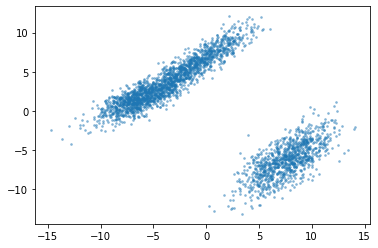

In [5]:
X = gen_data(k=3, dim=2, points_per_cluster=1000)

In [6]:
gmm = GMM(3, 2)

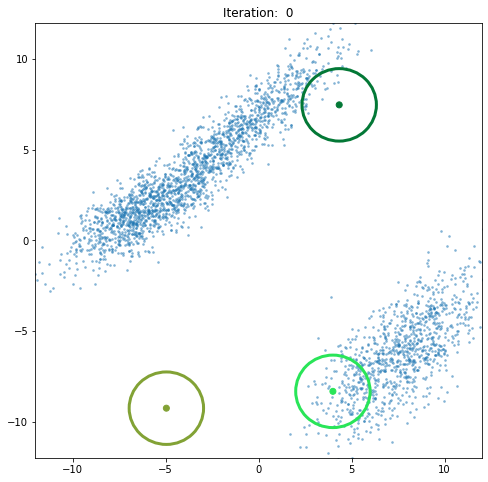

Iteration: 1, log-likelihood: -14414.1486


<Figure size 432x288 with 0 Axes>

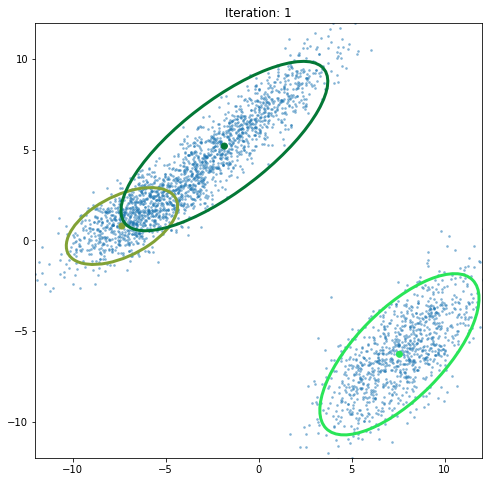

Iteration: 2, log-likelihood: -14167.8379


<Figure size 432x288 with 0 Axes>

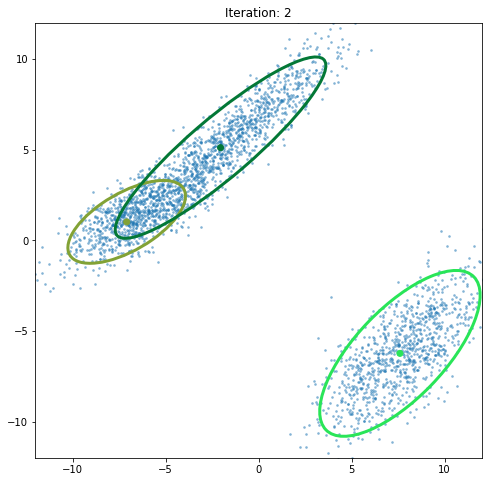

Iteration: 3, log-likelihood: -14148.8491


<Figure size 432x288 with 0 Axes>

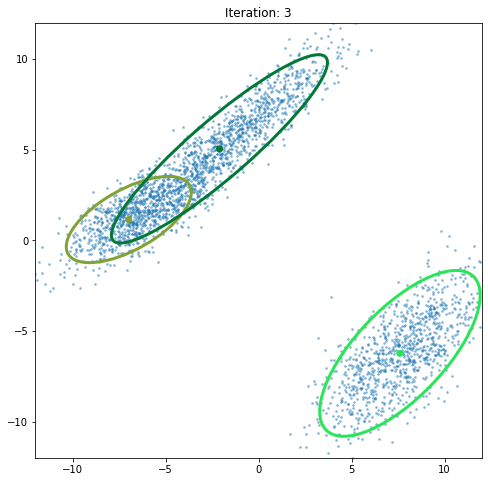

Iteration: 4, log-likelihood: -14142.9750


<Figure size 432x288 with 0 Axes>

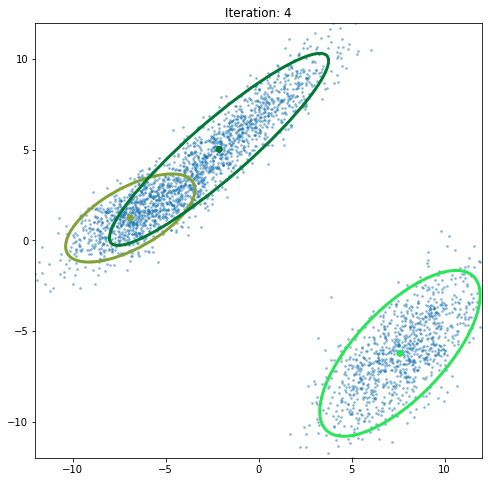

Iteration: 5, log-likelihood: -14140.6080


<Figure size 432x288 with 0 Axes>

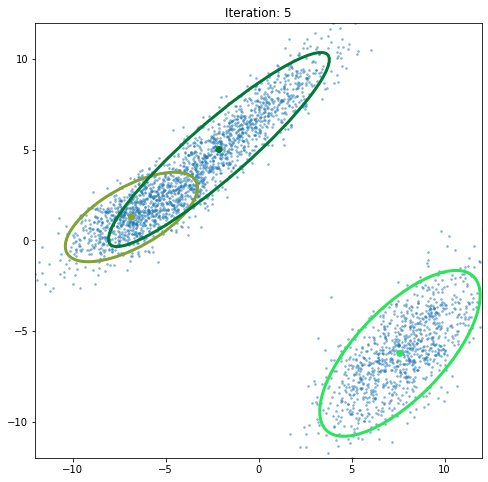

Iteration: 6, log-likelihood: -14139.4641


<Figure size 432x288 with 0 Axes>

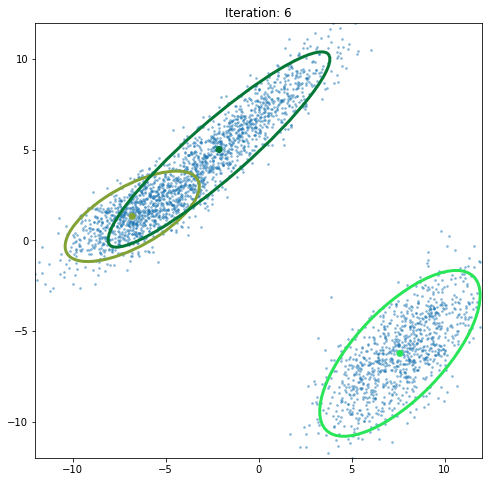

Iteration: 7, log-likelihood: -14138.8264


<Figure size 432x288 with 0 Axes>

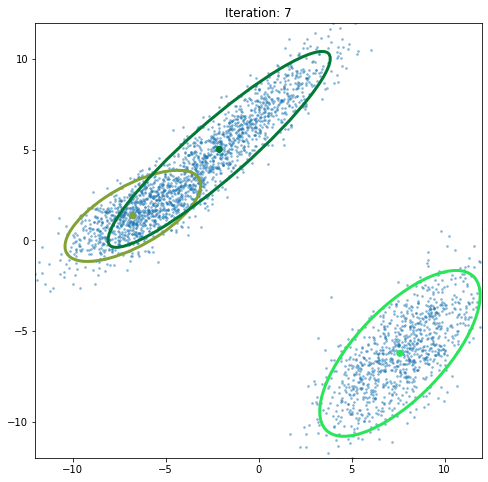

Iteration: 8, log-likelihood: -14138.4214


<Figure size 432x288 with 0 Axes>

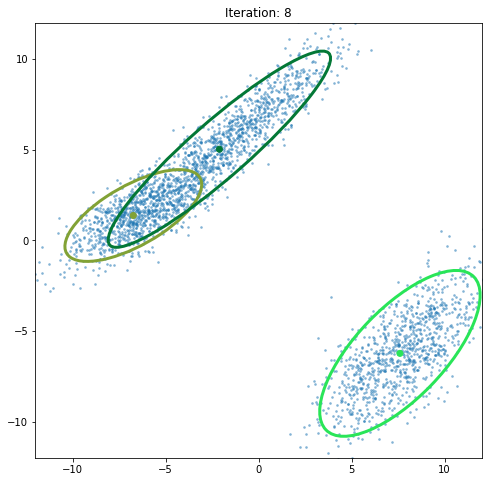

Iteration: 9, log-likelihood: -14138.1315


<Figure size 432x288 with 0 Axes>

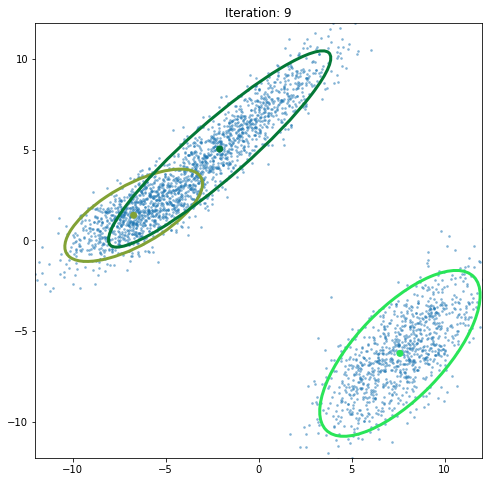

Iteration: 10, log-likelihood: -14137.9023


<Figure size 432x288 with 0 Axes>

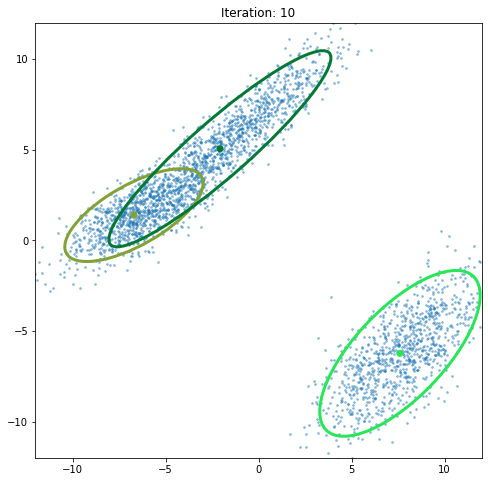

Iteration: 11, log-likelihood: -14137.7077


<Figure size 432x288 with 0 Axes>

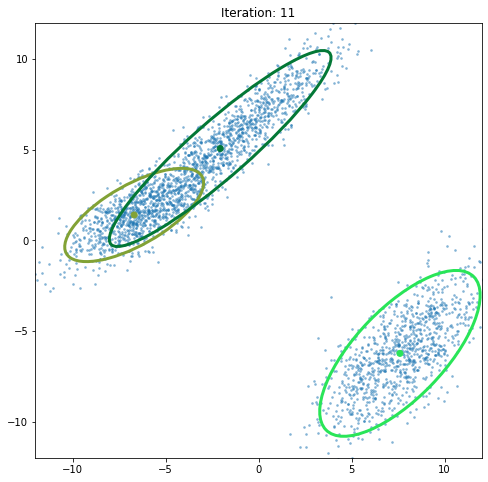

Iteration: 12, log-likelihood: -14137.5344


<Figure size 432x288 with 0 Axes>

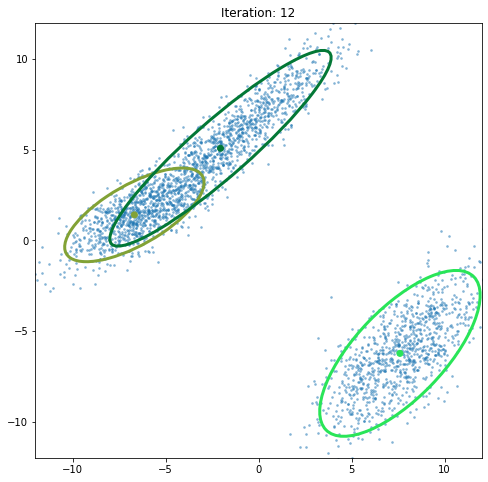

Iteration: 13, log-likelihood: -14137.3755


<Figure size 432x288 with 0 Axes>

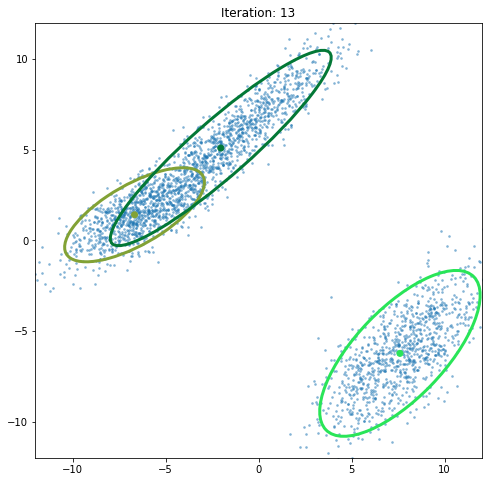

Iteration: 14, log-likelihood: -14137.2272


<Figure size 432x288 with 0 Axes>

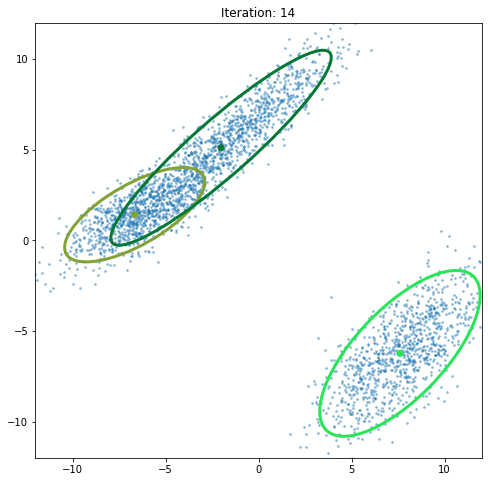

Iteration: 15, log-likelihood: -14137.0874


<Figure size 432x288 with 0 Axes>

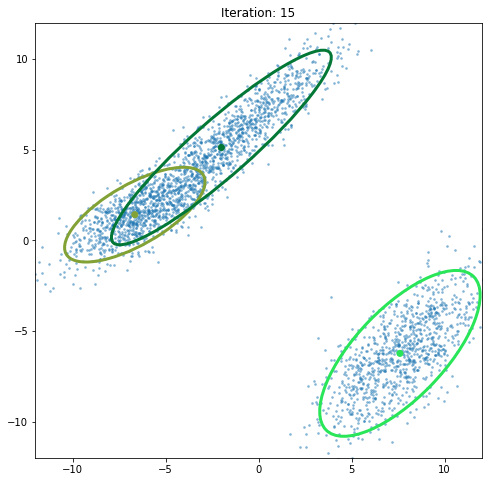

Iteration: 16, log-likelihood: -14136.9545


<Figure size 432x288 with 0 Axes>

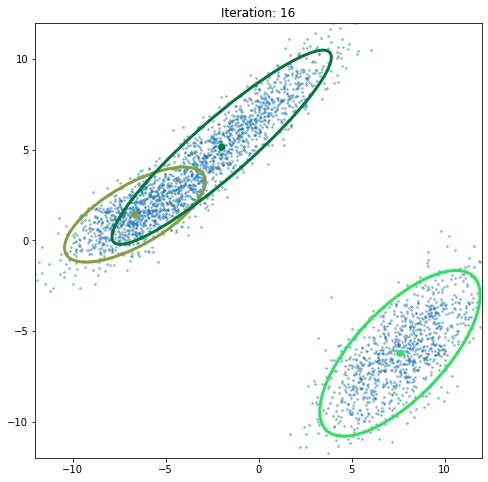

Iteration: 17, log-likelihood: -14136.8278


<Figure size 432x288 with 0 Axes>

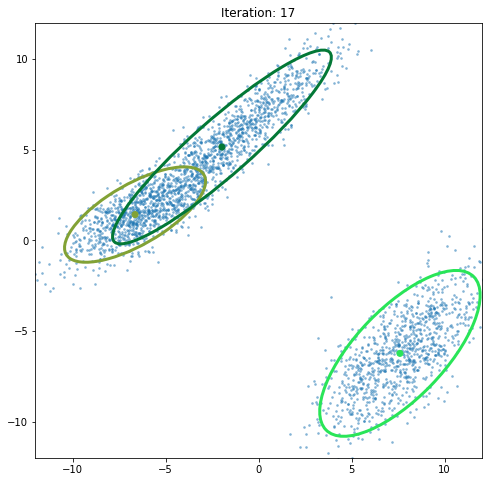

Iteration: 18, log-likelihood: -14136.7065


<Figure size 432x288 with 0 Axes>

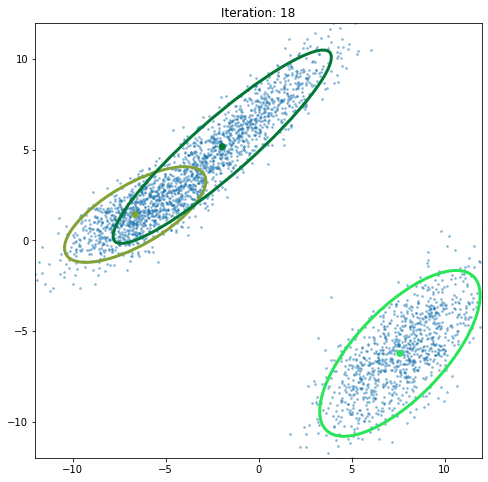

Iteration: 19, log-likelihood: -14136.5901


<Figure size 432x288 with 0 Axes>

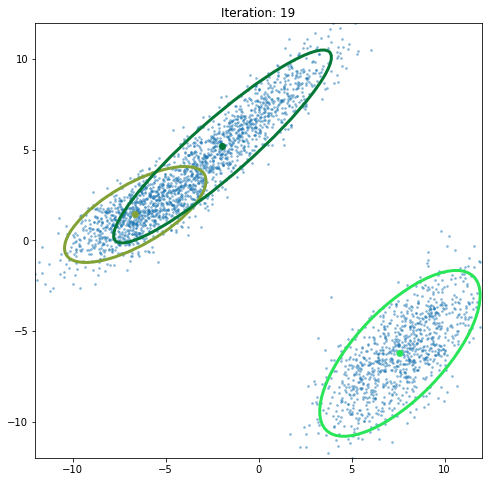

Iteration: 20, log-likelihood: -14136.4781


<Figure size 432x288 with 0 Axes>

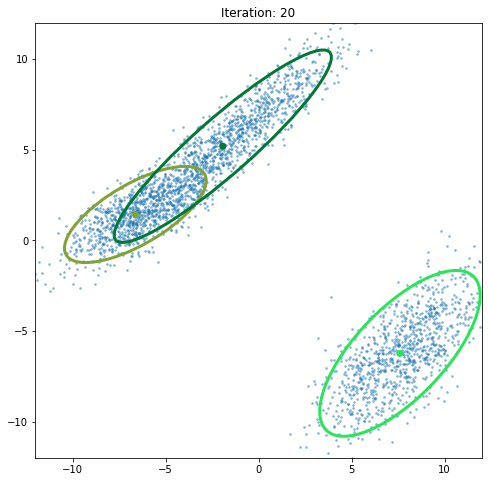

Iteration: 21, log-likelihood: -14136.3702


<Figure size 432x288 with 0 Axes>

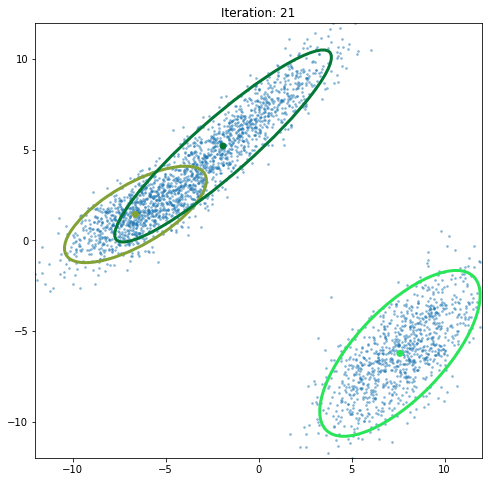

Iteration: 22, log-likelihood: -14136.2661


<Figure size 432x288 with 0 Axes>

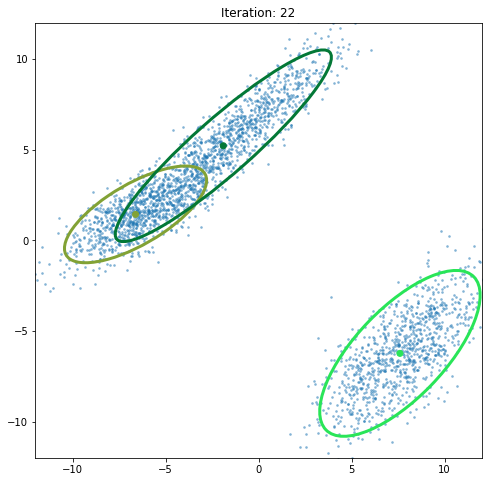

Iteration: 23, log-likelihood: -14136.1655


<Figure size 432x288 with 0 Axes>

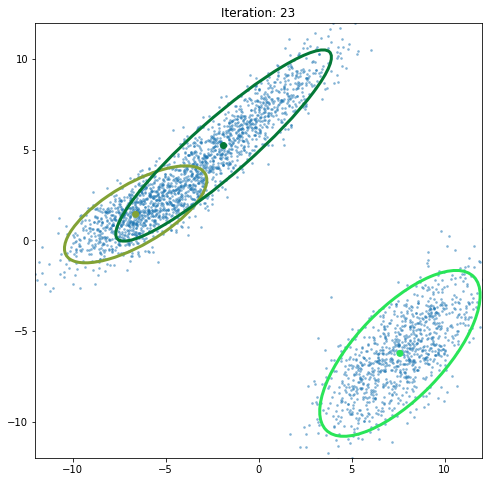

Iteration: 24, log-likelihood: -14136.0682


<Figure size 432x288 with 0 Axes>

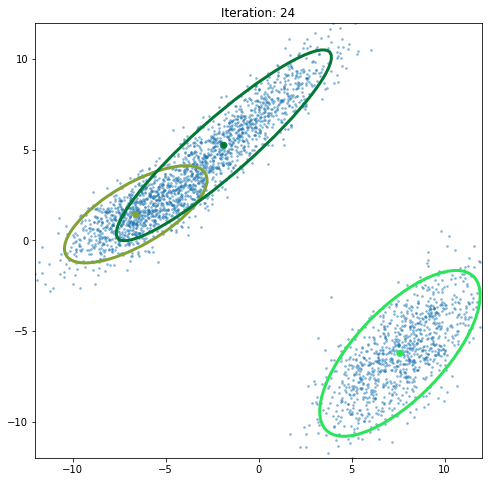

Iteration: 25, log-likelihood: -14135.9739


<Figure size 432x288 with 0 Axes>

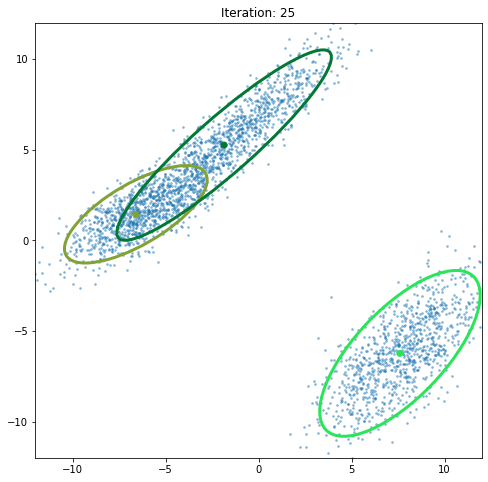

Iteration: 26, log-likelihood: -14135.8824


<Figure size 432x288 with 0 Axes>

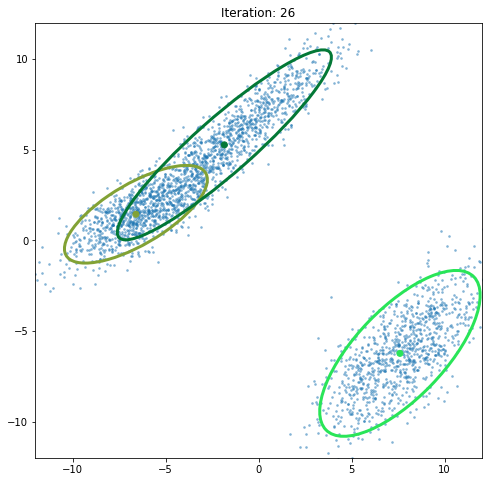

Iteration: 27, log-likelihood: -14135.7936


<Figure size 432x288 with 0 Axes>

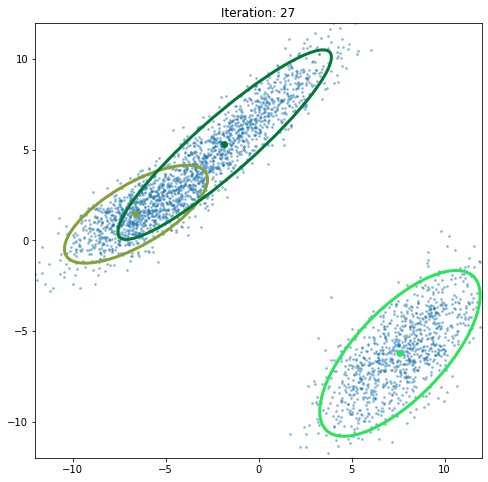

Iteration: 28, log-likelihood: -14135.7072


<Figure size 432x288 with 0 Axes>

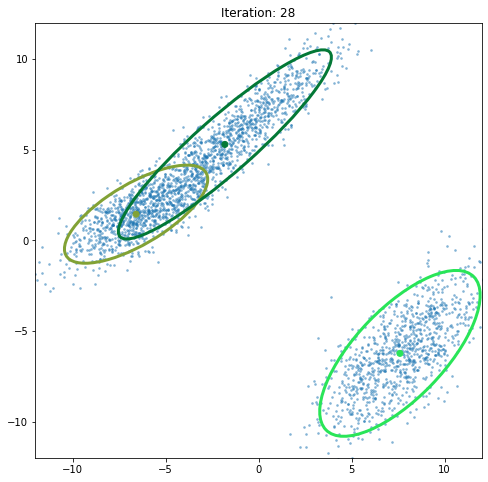

Iteration: 29, log-likelihood: -14135.6232


<Figure size 432x288 with 0 Axes>

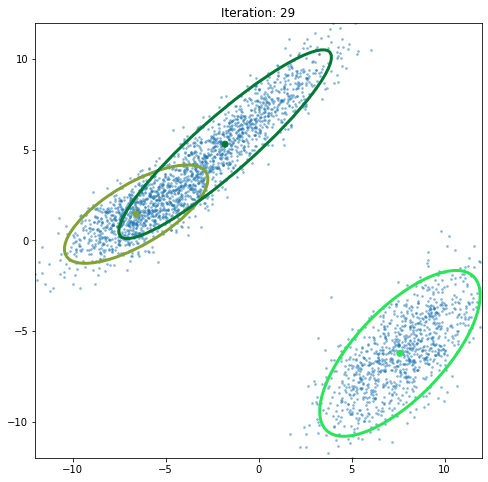

Iteration: 30, log-likelihood: -14135.5413


<Figure size 432x288 with 0 Axes>

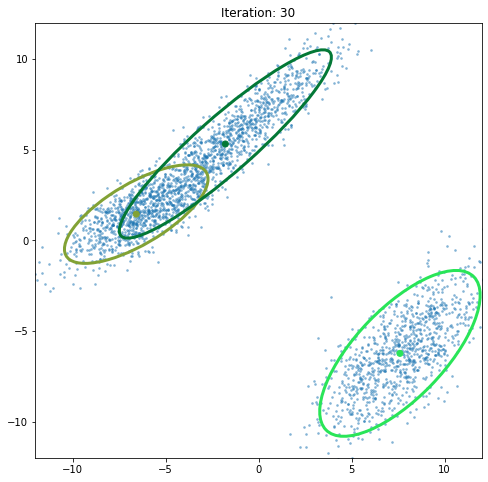

<Figure size 432x288 with 0 Axes>

In [7]:
gmm.init_em(X)
num_iters = 30
# Saving log-likelihood
log_likelihood = [gmm.log_likelihood(X)]
# plotting
plot("Iteration:  0")
for e in range(num_iters):
    # E-step
    gmm.e_step()
    # M-step
    gmm.m_step()
    # Computing log-likelihood
    log_likelihood.append(gmm.log_likelihood(X))
    print("Iteration: {}, log-likelihood: {:.4f}".format(e+1, log_likelihood[-1]))
    # plotting
    plot(title="Iteration: " + str(e+1))